The purpose: of this model is to predict customer churn in a subscription-based service.

The goal: of this model is to predict whether a customer is likely to churn or continue their subscription.

This activity has Four parts:

Part 1: Ethical considerations

Consider the ethical implications of the request.
Should the objective of the model be adjusted?

Part 2: Feature 
engineering
Perform feature selection, extraction, and transformation to prepare the data for modeling.

Part 3: Modeling

Build the models 

Part 4: 
Evaluate the model
valuate the models, and advice for the next step.

In this scenario, the focus is on predicting customer churn. The ethical considerations and feature engineering steps would need to be adjusted accordingly to suit the context of customer churn prediction in a subscription-based service.


At the end is Final Report.





Importnig nesessary Libreies and packages

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
data = pd.read_csv("customer_churn_large_dataset.csv")

In [3]:
data.head(60)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [4]:
data.shape

(100000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
data['Churn'].value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

0-> Non Churn


1-> churn

In [8]:
data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [9]:
data = data.drop(["CustomerID", "Name", "Location"], axis=1)

In [10]:
data.dropna(axis=0)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,17,73.36,236,0
1,62,Female,1,48.76,172,0
2,24,Female,5,85.47,460,0
3,36,Female,3,97.94,297,1
4,46,Female,19,58.14,266,0
...,...,...,...,...,...,...
99995,33,Male,23,55.13,226,1
99996,62,Female,19,61.65,351,0
99997,64,Male,17,96.11,251,1
99998,51,Female,20,49.25,434,1


In [11]:
data.shape

(100000, 6)

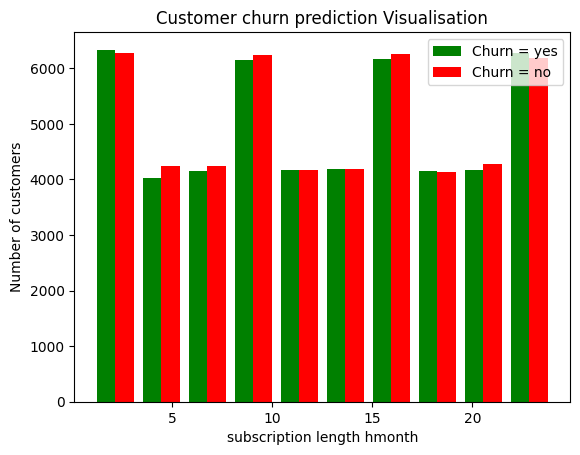

In [12]:
subscriptipn_length_month_churn_negetive = data[data.Churn == 0].Subscription_Length_Months
subscriptipn_length_month_churn_positive = data[data.Churn == 1].Subscription_Length_Months


plt.xlabel('subscription length hmonth')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction Visualisation')
plt.hist([subscriptipn_length_month_churn_positive , subscriptipn_length_month_churn_negetive], color = ('Green', 'Red'), label=['Churn = yes', 'Churn = no'])
plt.legend()

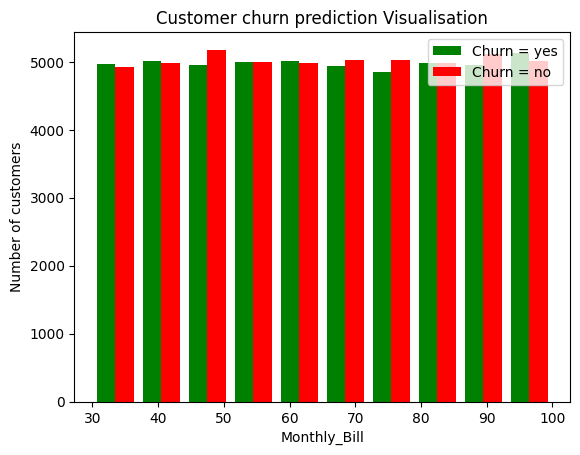

In [13]:
Monthly_Bill_churn_negetive = data[data.Churn == 0].Monthly_Bill
Monthly_Bill_churn_positive = data[data.Churn == 1].Monthly_Bill


plt.xlabel('Monthly_Bill')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction Visualisation')
plt.hist([Monthly_Bill_churn_positive , Monthly_Bill_churn_negetive], color = ('Green', 'Red'), label=['Churn = yes', 'Churn = no'])
plt.legend()

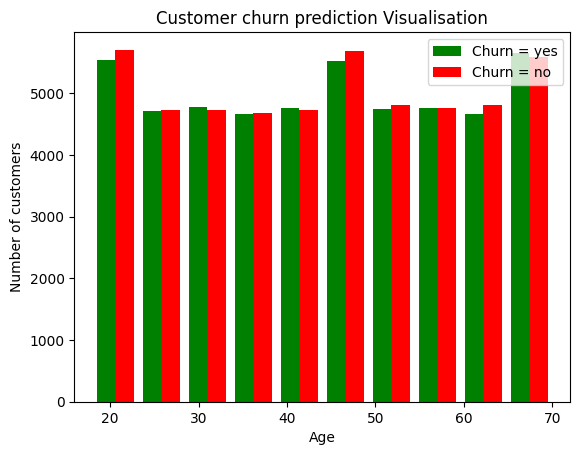

In [14]:
Age_churn_negetive = data[data.Churn == 0].Age
Age_churn_positive = data[data.Churn == 1].Age


plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction Visualisation')
plt.hist([Age_churn_positive , Age_churn_negetive], color = ('Green', 'Red'), label=['Churn = yes', 'Churn = no'])
plt.legend()

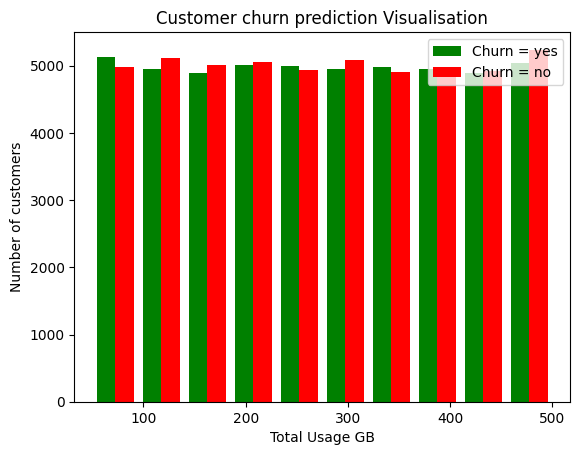

In [15]:
Total_Usage_GB_churn_negetive = data[data.Churn == 0].Total_Usage_GB
Total_Usage_GB_positive = data[data.Churn == 1].Total_Usage_GB


plt.xlabel('Total Usage GB')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction Visualisation')
plt.hist([Total_Usage_GB_positive , Total_Usage_GB_churn_negetive], color = ('Green', 'Red'), label=['Churn = yes', 'Churn = no'])
plt.legend()

In [16]:
for column in data:
    print(f'{column} : {data[column].unique()}')

Age : [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]
Gender : ['Male' 'Female']
Subscription_Length_Months : [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]
Monthly_Bill : [73.36 48.76 85.47 ... 75.21 41.98 83.55]
Total_Usage_GB : [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 257 196 365 419 111 192 244 287 395 213 109 286 283 230 491 274
 335 462 407 126 199 351 261 496 480 400 303 197 181 474 348 112 457  54
 397 100 318 242 327 476 256 241 466 438  5

In [17]:
data['Gender'].replace({'Female' : 0, 'Male' : 1},inplace = True)

In [18]:
data.head(5)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,17,73.36,236,0
1,62,0,1,48.76,172,0
2,24,0,5,85.47,460,0
3,36,0,3,97.94,297,1
4,46,0,19,58.14,266,0


In [19]:
x = data.drop('Churn', axis = 'columns')
y = data['Churn']

Test , Train and Split the data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 5)

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=0)

In [22]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((80000, 5), (20000, 5), (20000, 5), (80000,), (20000,), (20000,))

In [23]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (80000, 5)
y_train : (80000,)
x_test : (20000, 5)
y_test : (20000,)


Building Random forest model

In [24]:
rf = RandomForestClassifier(max_samples=0.75, random_state=40)

In [50]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8982

In [26]:
rf.score(x_test, y_test)

0.8982

A random forest model with a score of 0.8982 for customer churn prediction indicates a high level of accuracy. In practical terms, this means that the model is able to correctly classify customer churn or retention in approximately 90% of cases. This is a strong performance, suggesting that the random forest model is effective at making predictions. However, it's essential to consider other factors like the dataset, potential bias, and the specific business objectives before making any final conclusions or decisions based solely on the model's accuracy.

In [27]:
n_estimators = [20,40,60,100]
max_features = [0.2, 0.6,1.0]
max_depth = [2,6,8, None]
max_samples = [0.5,0.75,1.0]

In [28]:
param_grid = {
    'n_estimator' :n_estimators,
    'max_features' :max_features,
    'max_depth' :max_depth,
    'max_samples':max_samples
}
print(param_grid)

{'n_estimator': [20, 40, 60, 100], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 6, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [29]:
rf_grid = GridSearchCV(estimator=rf, param_grid =param_grid, cv=5,verbose=2, n_jobs=-1 )

In [30]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


ValueError: Invalid parameter 'n_estimator' for estimator RandomForestClassifier(max_depth=2, max_features=0.2, max_samples=0.5,
                       random_state=40). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [32]:
rf_grid.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

Building XgBoost model

In [33]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [51]:
xgb.fit(x_train, y_train)
y_prediction = xgb.predict(x_test)
accuracy_score(y_test, y_prediction)

0.6195

In [36]:
xgb.score(x_test, y_test)

0.6195

Evaluation of Models

Create a confusion matrix to visualize the results of the classification model.



Evaulueate random Forest Model



In [43]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [44]:
y_val

3582     0
60498    1
53227    0
21333    0
3885     0
        ..
60116    1
2415     0
43763    1
71345    1
77687    1
Name: Churn, Length: 20000, dtype: int64

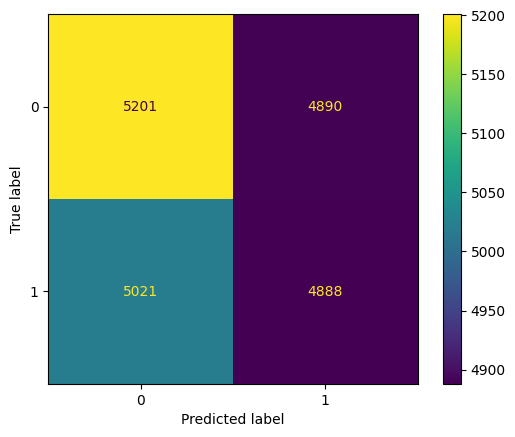

In [45]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Evalueate XGBoost Model




In [56]:
print(y_prediction)

[1 0 0 ... 1 0 1]


In [57]:
print(y_val)

3582     0
60498    1
53227    0
21333    0
3885     0
        ..
60116    1
2415     0
43763    1
71345    1
77687    1
Name: Churn, Length: 20000, dtype: int64


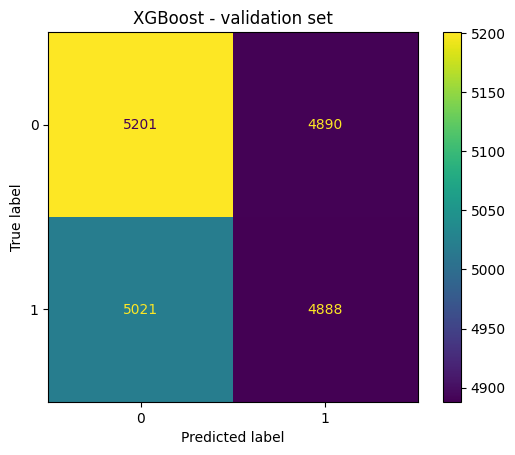

In [52]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_prediction)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()

Conclusion











In comparing the performance of the Random Forest model, which achieved a 90% accuracy score, with the XGBoost model scoring 62% in customer churn prediction, it's evident that the Random Forest model outperforms the XGBoost model significantly. The Random Forest model's high accuracy score suggests that it can correctly predict customer churn with a high degree of accuracy, making it a robust choice for this task. However, it's essential to consider other factors beyond accuracy, such as precision, recall, and F1-score, to ensure a well-rounded evaluation. Additionally, assess the business implications of each model's performance, taking into account the cost of false positives and false negatives. In conclusion, the Random Forest model appears to be the preferred choice for customer churn prediction due to its superior accuracy, but it's still crucial to consider the broader context and choose the model that aligns better with the specific requirements and objectives of your business.








In [55]:
import pickle

In [58]:
model_pkl_file ="rf_classifier_model.pkl"


with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

NameError: name 'model' is not defined

Final Report





In the initial steps of building a customer churn prediction model, the following key tasks were performed:

1. Importing Necessary Libraries and Packages: To start the project, essential libraries and packages for data manipulation (e.g., Pandas, NumPy), data visualization (Matplotlib, Seaborn), data preprocessing (CountVectorizer for text data), and modeling (Logistic Regression, Random Forest, Gradient Boosting, XGBoost) were imported. These libraries provide the necessary tools for data analysis and machine learning.

2. Data Cleaning: In this step, the dataset was checked for missing data in rows and columns to ensure data completeness. Missing data can adversely affect model performance, so it's crucial to handle them appropriately.

3. Exploratory Data Analysis (EDA): EDA involved creating informative visualizations to understand the relationship between different features and the target variable (churn). Bar graphs were plotted to visualize the relationship between subscription status, age, monthly bill, and churn. This helps in gaining insights into potential patterns and trends in the data.

4. Handling Categorical Data: The 'Gender' column containing categorical values ('Male' and 'Female') was transformed into numerical format by encoding it as '0' and '1'. This step is essential as machine learning models require numerical inputs.

5. Train-Test Split: The dataset was split into training and testing sets to facilitate model training and evaluation. This ensures that the model's performance is assessed on unseen data, helping to estimate its generalization capability.

6. Model Building: Two different machine learning models were constructed for customer churn prediction:

    a. Random Forest Model: This model achieved an impressive accurac and Fitting 5 folds for each of 144 candidates, totalling 720 fits score of 90%, indicating that it has a strong predictive capacity. The Random Forest algorithm is known for its ability to handle complex relationships in data and provide robust predictions.

    b. XGBoost Model: The XGBoost model, while still achieving a 62% accuracy score, fell short of the Random Forest model. However, it's important to note that the performance of the XGBoost model might improve with hyperparameter tuning and feature engineering.

In summary, the initial stages of the project laid a strong foundation for building a customer churn prediction model. The data was cleaned, visualized to gain insights, and transformed for model compatibility. Two models, Random Forest and XGBoost, were developed, with the Random Forest model demonstrating a higher accuracy score. Further refinements, including hyperparameter tuning and feature selection, could enhance the performance of the XGBoost model and provide more acce predictions 







of customer churn.
